### **Understanding different Datasets for the Analysis of Traffic-Accidents-in-Kenya**

In [2]:
# importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Exploring the road death 2019 dataset from kaggle by Kamau Munyori**

In [3]:
# load the road death data by Kamau Munyori in kaggle
road_death = pd.read_csv(r"Data\road_death_2019.csv")
road_death.head(5)

,continent,code,country,year,road traffic death rate
0,Americas,ATG,Antigua and Barbuda,2019,0.00
1,Western Pacific,FSM,Micronesia (Federated States of),2019,0.16
2,South-East Asia,MDV,Maldives,2019,1.63
3,Western Pacific,KIR,Kiribati,2019,1.92
4,Eastern Mediterranean,EGY,Egypt,2019,10.10


In [4]:
# Convert 'year' to datetime (will default to YYYY-01-01 format)
road_death['year'] = pd.to_datetime(road_death['year'], format='%Y')

# Set 'year' as the index
road_death = road_death.set_index('year')

In [5]:
road_death.head()

,continent,code,country,road traffic death rate
year,,,,
2019-01-01,Americas,ATG,Antigua and Barbuda,0.00
2019-01-01,Western Pacific,FSM,Micronesia (Federated States of),0.16
2019-01-01,South-East Asia,MDV,Maldives,1.63
2019-01-01,Western Pacific,KIR,Kiribati,1.92
2019-01-01,Eastern Mediterranean,EGY,Egypt,10.10


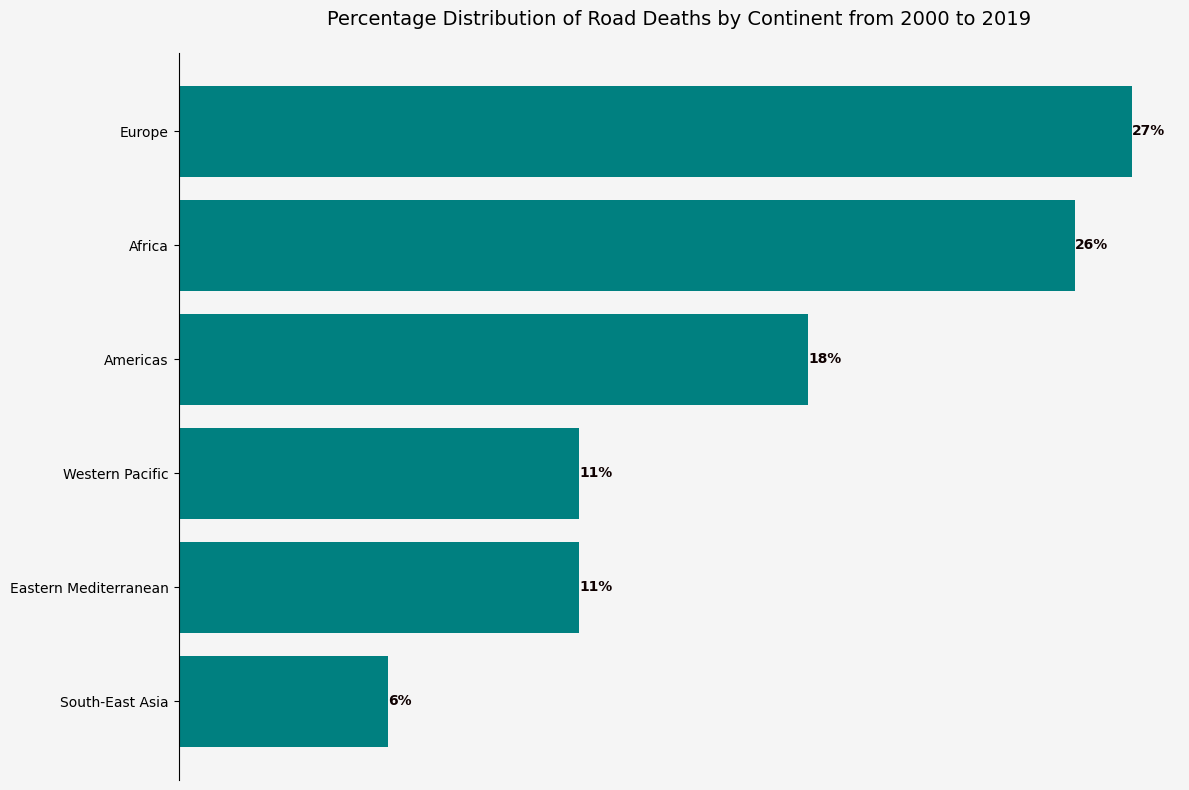

In [6]:
# Calculate the percentage count of each continent
continent_counts = road_death['continent'].value_counts(normalize=True) * 100

# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Create a bar plot with continent names on y-axis and percentages on x-axis
# Use different colors for each continent bar
bars = plt.barh(continent_counts.index, 
                continent_counts.values,
                color = 'teal'
               )

# Remove x-axis as instructed
plt.gca().xaxis.set_visible(False)

# Add data labels as percentages inside the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width,                      # x position (right end of bar)
             bar.get_y() + bar.get_height()/2,  # y position (center of bar)
             f'{width:.0f}%',            # text (percentage with 0 decimal)
             ha='left',                  # horizontal alignment
             va='center',                # vertical alignment
             color='#0f0101',              # white text for visibility
             fontweight='bold')          # bold text

# Remove spines (top, right, and bottom as x-axis is removed)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add a title
plt.title('Percentage Distribution of Road Deaths by Continent from 2000 to 2019', pad=20, fontsize=14)

# Set background colors (ADD THESE LINES)
plt.gca().set_facecolor('#f5f5f5')  # Light gray axes background
plt.gcf().set_facecolor('#f5f5f5')  # Light gray axes background

# Invert y-axis to show highest at top 
plt.gca().invert_yaxis()

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

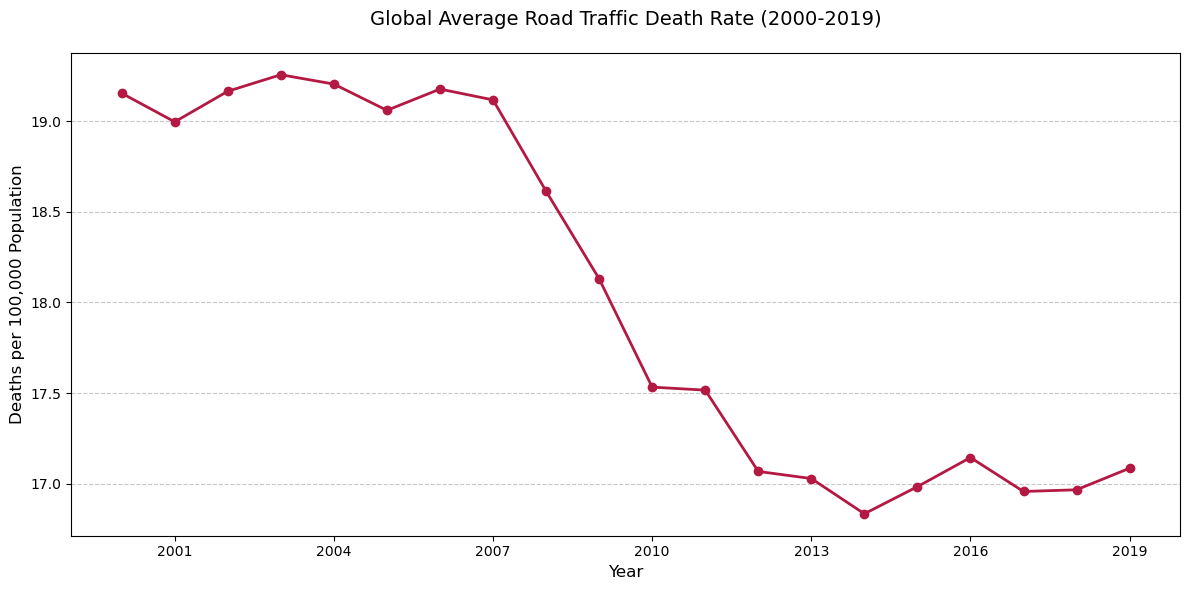

In [ ]:
# Extracting the year from the road death
yearly_avg = road_death.groupby('year')['road traffic death rate'].mean()

# Plot directly using the index (years)
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values,  # Explicitly use index for x-axis
         marker='o', linestyle='-', color='#B31942', linewidth=2, label='Death Rate')

# Formatting
plt.title('Global Average Road Traffic Death Rate (2000-2019)', pad=20, fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths per 100,000 Population', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure all years are shown as integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### **Analyzing the Road accidents and incidents data (Nairobi, Kenya) by worldbank**

In [20]:
# load the road death data by Kamau Munyori in kaggle
Nairobi_Road_Crashes = pd.read_csv(r"Data\Nairobi-Road-crashes.csv")
Nairobi_Road_Crashes.head()

,crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,location
0,1,06/06/2018 20:39,06/06/2018,-1.263030,36.764374,1,0,0,0,0,"Musa Gitau, Kitisuru location, Kitisuru ward, ..."
1,2,17/08/2018 06:15,17/08/2018,-0.829710,37.037820,1,1,0,0,0,"Kigumo, Murang`a, Central Kenya, Kenya"
2,3,25/05/2018 17:51,25/05/2018,-1.125301,37.003297,1,0,0,0,0,"Thika Road, Kalimoni ward, Juja, Kiambu, Centr..."
3,4,25/05/2018 18:11,25/05/2018,-1.740958,37.129025,1,0,0,0,0,"Konza, Isinya-Kiserian Road, Konza sublocation..."
4,5,25/05/2018 21:59,25/05/2018,-1.259392,36.842321,1,1,0,0,0,"Kiambu Road, Muthaiga sublocation, Highridge l..."


In [ ]:
Nairobi_Road_Crashes.dtypes

crash_id                              int64
crash_datetime               datetime64[ns]
crash_date                   datetime64[ns]
latitude                            float64
longitude                           float64
n_crash_reports                       int64
contains_fatality_words               int64
contains_pedestrian_words             int64
contains_matatu_words                 int64
contains_motorcycle_words             int64
location                             object
dtype: object

In [22]:
Nairobi_Road_Crashes[['crash_datetime', 'crash_date']].head()

,crash_datetime,crash_date
0,06/06/2018 20:39,06/06/2018
1,17/08/2018 06:15,17/08/2018
2,25/05/2018 17:51,25/05/2018
3,25/05/2018 18:11,25/05/2018
4,25/05/2018 21:59,25/05/2018


In [23]:
# Convert crash_datetime (contains both date and time)
Nairobi_Road_Crashes['crash_datetime'] = pd.to_datetime(
    Nairobi_Road_Crashes['crash_datetime'],
    format='%d/%m/%Y %H:%M',  # Matches "06/06/2018 20:39" format
    errors='coerce'  # Converts invalid entries to NaT
)

# Convert crash_date (date only)
Nairobi_Road_Crashes['crash_date'] = pd.to_datetime(
    Nairobi_Road_Crashes['crash_date'],
    format='%d/%m/%Y',  # Matches "06/06/2018" format
    errors='coerce'
)

# Verify the changes
Nairobi_Road_Crashes.head()

,crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words,location
0,1,2018-06-06 20:39:00,2018-06-06,-1.263030,36.764374,1,0,0,0,0,"Musa Gitau, Kitisuru location, Kitisuru ward, ..."
1,2,2018-08-17 06:15:00,2018-08-17,-0.829710,37.037820,1,1,0,0,0,"Kigumo, Murang`a, Central Kenya, Kenya"
2,3,2018-05-25 17:51:00,2018-05-25,-1.125301,37.003297,1,0,0,0,0,"Thika Road, Kalimoni ward, Juja, Kiambu, Centr..."
3,4,2018-05-25 18:11:00,2018-05-25,-1.740958,37.129025,1,0,0,0,0,"Konza, Isinya-Kiserian Road, Konza sublocation..."
4,5,2018-05-25 21:59:00,2018-05-25,-1.259392,36.842321,1,1,0,0,0,"Kiambu Road, Muthaiga sublocation, Highridge l..."


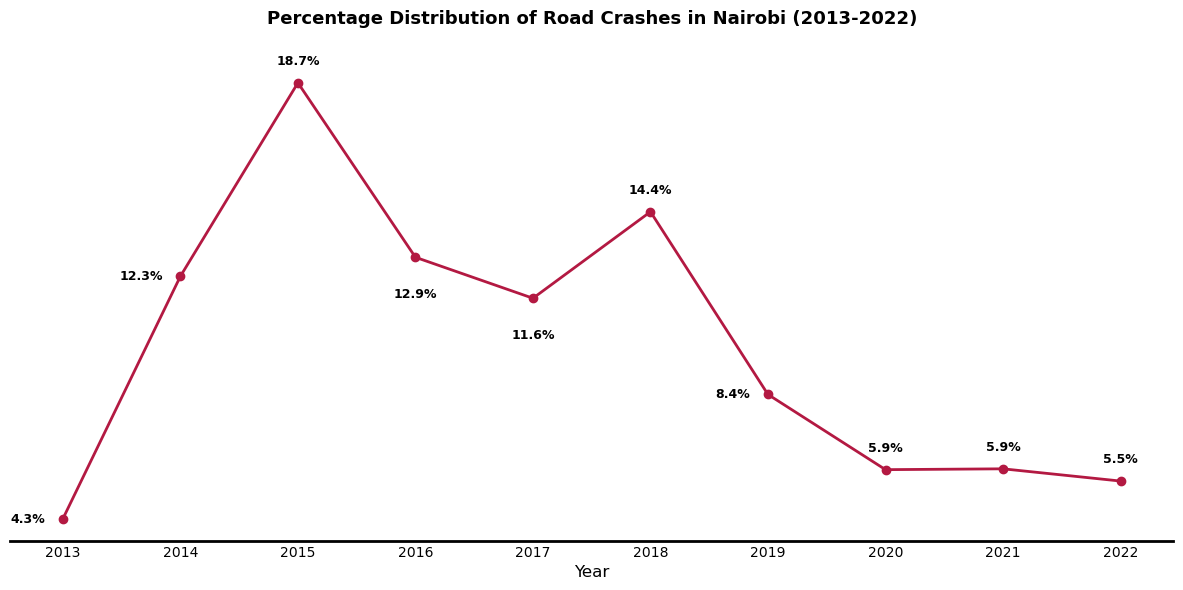

In [ ]:
# Extract year from crash_date
Nairobi_Road_Crashes['year'] = Nairobi_Road_Crashes['crash_date'].dt.year

# Filter out 2012 and 2023 records
filtered_data = Nairobi_Road_Crashes[
    (Nairobi_Road_Crashes['year'] >= 2013) & 
    (Nairobi_Road_Crashes['year'] <= 2022)
]

# Calculate yearly counts and convert to percentages (rounded to integers)
yearly_counts = filtered_data['year'].value_counts().sort_index()
percentages = ((yearly_counts / yearly_counts.sum()) * 100)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(percentages.index, percentages.values, 
         marker='o', linestyle='-', color='#B31942', linewidth=2)

# Add data labels with custom positioning
for year, pct in zip(percentages.index, percentages.values):
    # Custom positioning based on year
    if year in [2013, 2014, 2019]:
        # Place to the left of the point
        plt.text(year-0.15, pct, f'{pct:.1f}%', 
                 ha='right', va='center',
                 fontsize=9, fontweight='bold')
    elif year in [2016, 2017]:
        # Place below the point
        plt.text(year, pct-1, f'{pct:.1f}%', 
                 ha='center', va='top',
                 fontsize=9, fontweight='bold')
    else:
        # Default position (above the point)
        plt.text(year, pct+0.5, f'{pct:.1f}%', 
                 ha='center', va='bottom',
                 fontsize=9, fontweight='bold')

# Formatting
title = plt.title('Percentage Distribution of Road Crashes in Nairobi (2013-2022)', 
                 pad=20, fontsize=13, 
                 loc='center',
                 y=1.02,
                 fontweight='bold')

plt.xlabel('Year', fontsize=12)

# Custom x-axis styling
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
plt.grid(False)

# Enhanced x-axis line
ax.spines['bottom'].set_linewidth(2)  # Thicker baseline
ax.spines['bottom'].set_linestyle("-")  # continuous line
ax.spines['bottom'].set_color("black")   # Black color

# Set x-axis ticks for each year with equal spacing
plt.xticks(percentages.index)
ax.xaxis.set_minor_locator(plt.FixedLocator(percentages.index))
ax.tick_params(axis='x', which='both', length=0)  
ax.set_xticklabels(percentages.index, ha='center')  # Center aligned labels

plt.tight_layout()
plt.show()

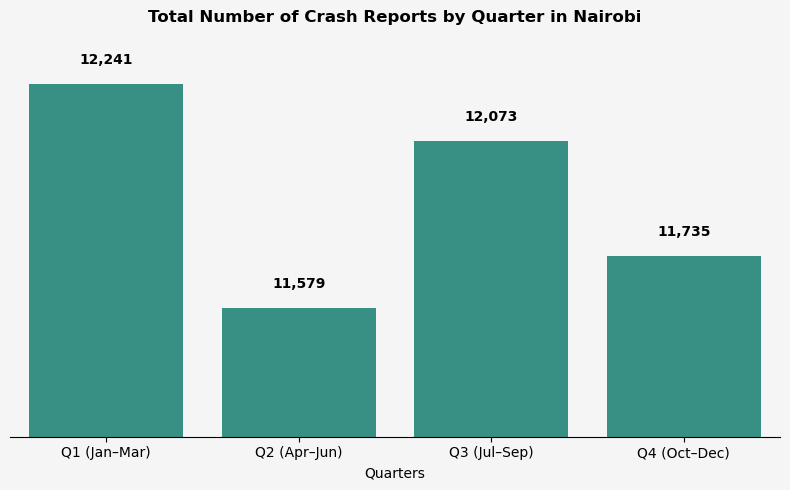

In [312]:
# Step 1: Extract quarter and label
Nairobi_Road_Crashes['quarter'] = Nairobi_Road_Crashes['crash_datetime'].dt.quarter
Nairobi_Road_Crashes['quarter_label'] = Nairobi_Road_Crashes['quarter'].apply(lambda x: f'Q{x}')

# Step 2: Define detailed quarter labels
quarter_name_mapping = {
    'Q1': 'Q1 (Jan–Mar)',
    'Q2': 'Q2 (Apr–Jun)',
    'Q3': 'Q3 (Jul–Sep)',
    'Q4': 'Q4 (Oct–Dec)'
}
ordered_quarters = ['Q1', 'Q2', 'Q3', 'Q4']
Quarters = [quarter_name_mapping[q] for q in ordered_quarters]

# Step 3: Group by quarter and sum crash reports
total_crashes_by_quarter = (
    Nairobi_Road_Crashes
    .groupby('quarter_label')['n_crash_reports']
    .sum()
    .reindex(ordered_quarters)
    .reset_index()
)
total_crashes_by_quarter['Quarters'] = Quarters

# Step 4: Plot bar chart with specified modifications
plt.figure(figsize=(8, 5), facecolor='#f5f5f5')
constant_color = '#2a9d8f'  # Set your preferred color here

ax = sns.barplot(
    data=total_crashes_by_quarter,
    x='Quarters',
    y='n_crash_reports',
    color=constant_color
)

# Set background color
ax.set_facecolor('#f5f5f5')

# Remove gridlines and spines
ax.grid(False)
sns.despine(top=True, right=True, left=True)

# Hide y-axis
ax.set_ylabel("")
ax.set_yticks([])

# Set custom y-axis limits
ax.set_ylim(11200, 12400)

# Add data labels on top of each bar with thousands separator
for index, row in total_crashes_by_quarter.iterrows():
    ax.text(index, row['n_crash_reports'] + 50, f"{int(row['n_crash_reports']):,}",
            ha='center', va='bottom', fontsize=10, weight='bold')

# Title
ax.set_title("Total Number of Crash Reports by Quarter in Nairobi", fontsize=12, weight='bold')

# Layout adjustment
plt.tight_layout()
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



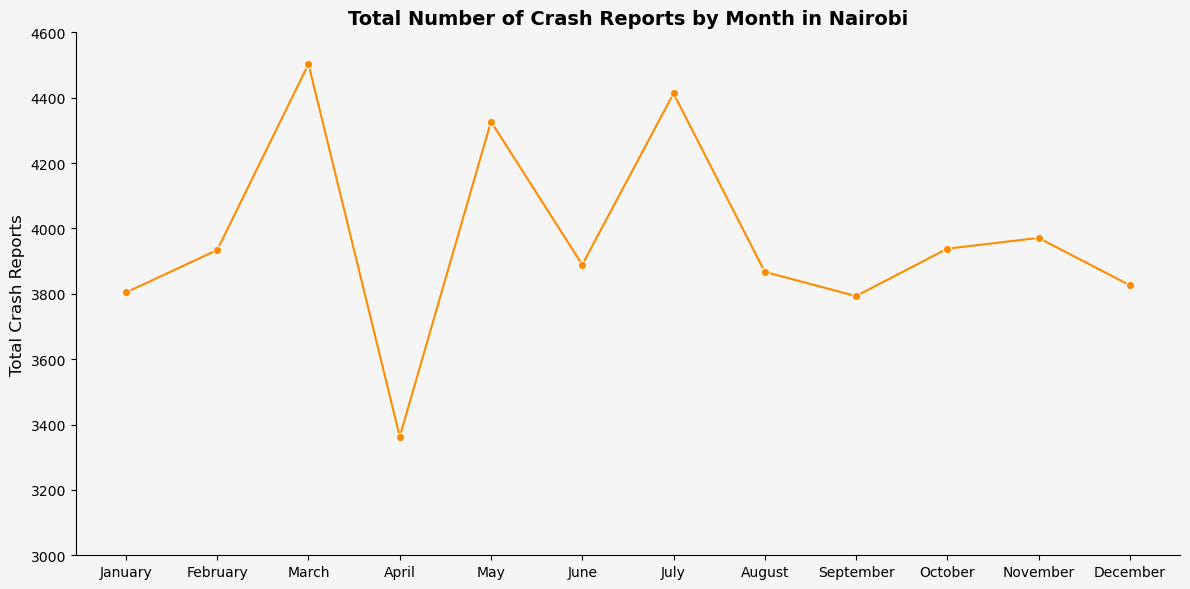

In [309]:
# Step 1: Extract month name
Nairobi_Road_Crashes['month'] = Nairobi_Road_Crashes['crash_datetime'].dt.month_name()

# Step 2: Define the order of months
ordered_months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Step 3: Group by month and sum crash reports
total_crashes_by_month = (
    Nairobi_Road_Crashes
    .groupby('month')['n_crash_reports']
    .sum()
    .reindex(ordered_months)
    .reset_index()
)

# Step 4: Plot
plt.figure(figsize=(12, 6), facecolor='#f5f5f5')
ax = sns.lineplot(data=total_crashes_by_month, x='month', y='n_crash_reports',
                  marker='o', color='darkorange')

# Set background color
ax.set_facecolor('#f5f5f5')

# Remove gridlines
ax.grid(False)

# Set custom y-axis limits
ax.set_ylim(3000, 4600)

# Remove top and right spines
sns.despine(top=True, right=True)

# Set labels and title
ax.set_title("Total Number of Crash Reports by Month in Nairobi", fontsize=14, weight='bold')
ax.set_xlabel("")  # No need to label x-axis explicitly
ax.set_ylabel("Total Crash Reports", fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



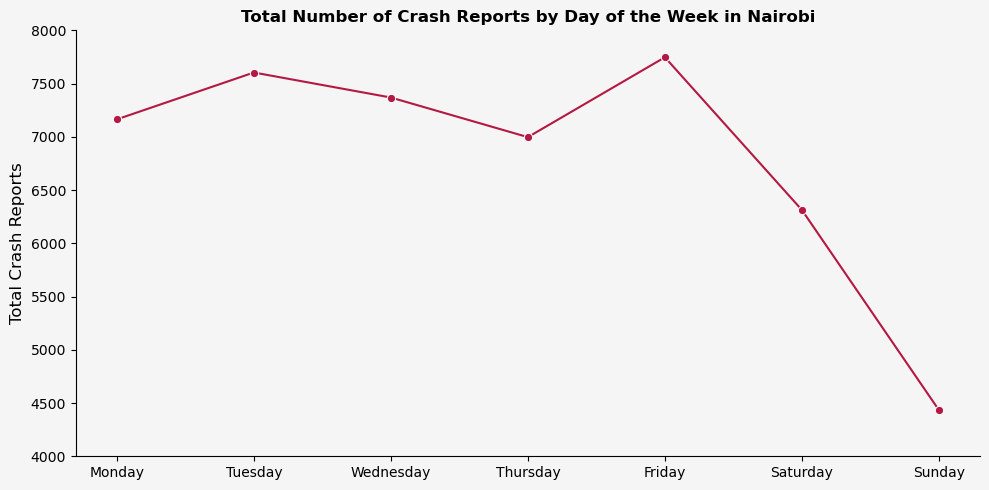

In [313]:
# Step 1: Extract day of the week
Nairobi_Road_Crashes['day_of_week'] = Nairobi_Road_Crashes['crash_datetime'].dt.day_name()

# Step 2: Define custom order of days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 3: Group by day and sum crash reports
total_crashes_by_day = (
    Nairobi_Road_Crashes
    .groupby('day_of_week')['n_crash_reports']
    .sum()
    .reindex(ordered_days)
    .reset_index()
)

# Step 4: Plot
plt.figure(figsize=(10, 5), facecolor='#f5f5f5')
ax = sns.lineplot(data=total_crashes_by_day, x='day_of_week', y='n_crash_reports',
                  marker='o', color='#B31942')

# Set background color
ax.set_facecolor('#f5f5f5')

# Set custom y-axis limits
ax.set_ylim(4000, 8000)

# Remove gridlines
ax.grid(False)

# Remove top and right spines
sns.despine(top=True, right=True)

# Set labels and title
ax.set_title("Total Number of Crash Reports by Day of the Week in Nairobi", fontsize=12, weight='bold')
ax.set_xlabel("")  # No need to label x-axis explicitly
ax.set_ylabel("Total Crash Reports", fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()


c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


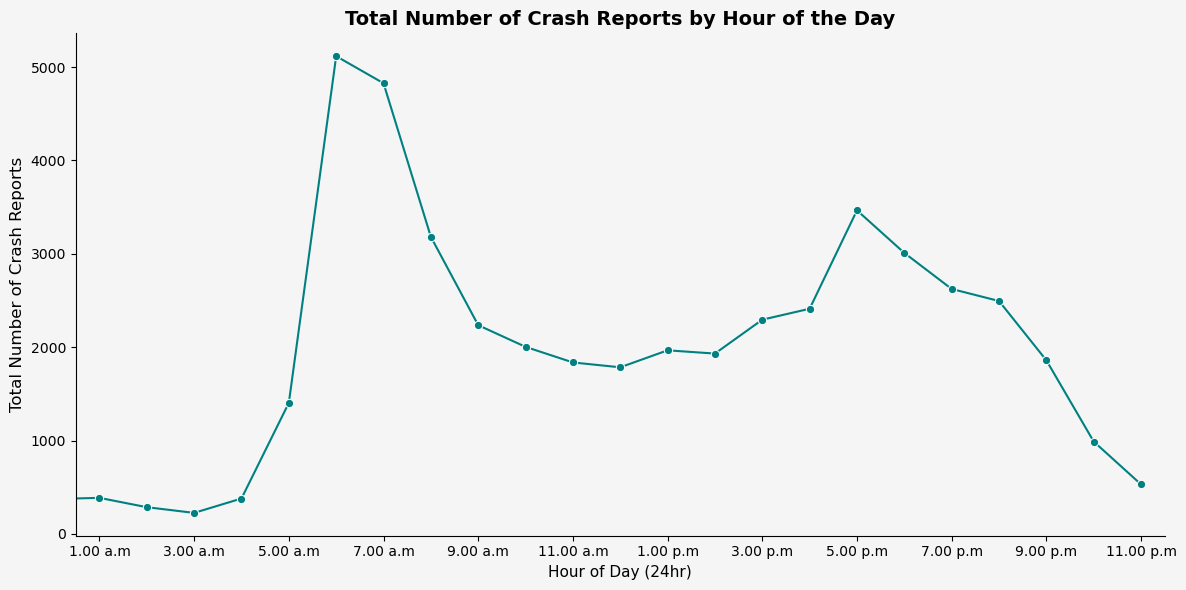

In [255]:
# Step 1: Extract hour
Nairobi_Road_Crashes['hour'] = Nairobi_Road_Crashes['crash_datetime'].dt.hour

# Step 2: Group by hour and average
# avg_crashes_by_hour = Nairobi_Road_Crashes.groupby('hour')['n_crash_reports'].mean().reset_index()
total_crashes_by_hour = Nairobi_Road_Crashes.groupby('hour')['n_crash_reports'].sum().reset_index()


# Step 3: Define custom x-tick labels
custom_ticks = list(range(1, 24, 2))  # 1, 3, 5, ..., 23
custom_labels = [f"{h}.00 a.m" if h < 12 else (f"{h-12}.00 p.m" if h > 12 else "12.00 p.m") for h in custom_ticks]

# Step 4: Plot
plt.figure(figsize=(12, 6), facecolor='#f5f5f5')
# ax = sns.lineplot(data=avg_crashes_by_hour, x='hour', y='n_crash_reports', marker='o', color='teal')
ax = sns.lineplot(data=total_crashes_by_hour, x='hour', y='n_crash_reports', marker='o', color='teal')

# Set background color
ax.set_facecolor('#f5f5f5')

# Remove gridlines
ax.grid(False)

# Set custom x-ticks and labels
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_labels)

# Add padding to x-axis (left and right)
ax.set_xlim(0.5, 23.5)

# Remove top and right spines
sns.despine(top=True, right=True)

# Set labels and title
ax.set_title("Total Number of Crash Reports by Hour of the Day", fontsize=14, weight='bold')
ax.set_xlabel("Hour of Day (24hr)", fontsize=11)
ax.set_ylabel("Total Number of Crash Reports", fontsize=12)

# Layout adjustment
plt.tight_layout()
plt.show()

In [241]:
from extract_county import extract_county

# Apply the function to your DataFrame
Nairobi_Road_Crashes['county'] = Nairobi_Road_Crashes['location'].apply(extract_county)

In [314]:
county_crashes = pd.DataFrame(Nairobi_Road_Crashes['county'].value_counts())
county_crashes.head(5)

,count
county,
Nairobi,26921
Kiambu,4222
Machakos,1225
Kajiado,560
Murang'a,279


In [245]:
# Filter rows where county is 'Other'
other_county_locations = Nairobi_Road_Crashes[Nairobi_Road_Crashes['county'] == 'Other'][['location', 'county']]

# Set display options to show full content
pd.set_option('display.max_colwidth', None)

# Now display your DataFrame
other_county_locations.tail()

,location,county
32954,Error retrieving location,Other
33020,Error retrieving location,Other
33298,Error retrieving location,Other
33430,Error retrieving location,Other
33589,Error retrieving location,Other


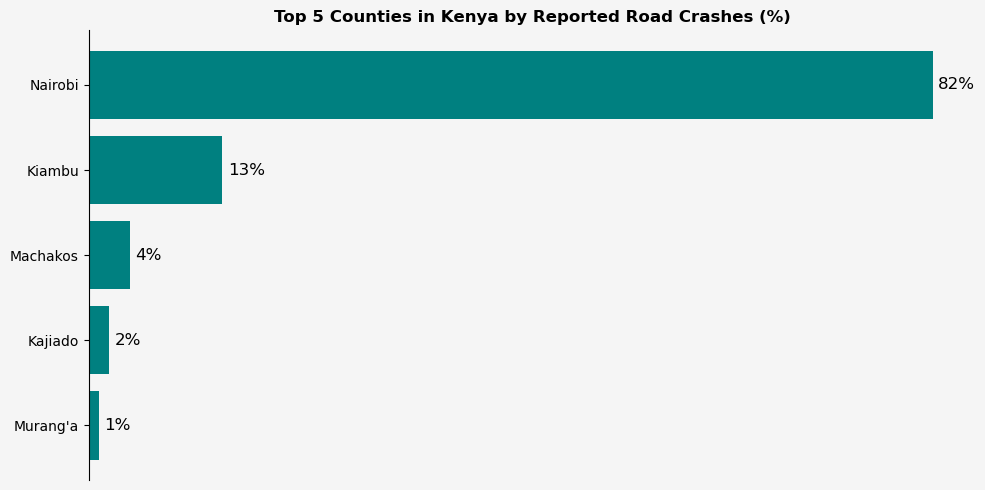

In [250]:
# Step 1: Get the top 5 counties by count
county_counts = Nairobi_Road_Crashes['county'].value_counts().nlargest(5)
total = county_counts.sum()

# Step 2: Convert to percentages and round up
county_percentages = np.ceil((county_counts / total) * 100)

# Step 3: Plot
plt.figure(figsize=(10, 5), facecolor="#f5f5f5")
bars = plt.barh(county_percentages.index, county_percentages.values, color='teal')

# Step 4: Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{int(width)}%", va='center', fontsize=12)

# Step 5: Formatting
ax = plt.gca()
ax.set_facecolor("#f5f5f5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.invert_yaxis()  # Largest on top
ax.set_xticks([])  # Remove x-axis ticks

plt.title("Top 5 Counties in Kenya by Reported Road Crashes (%)", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


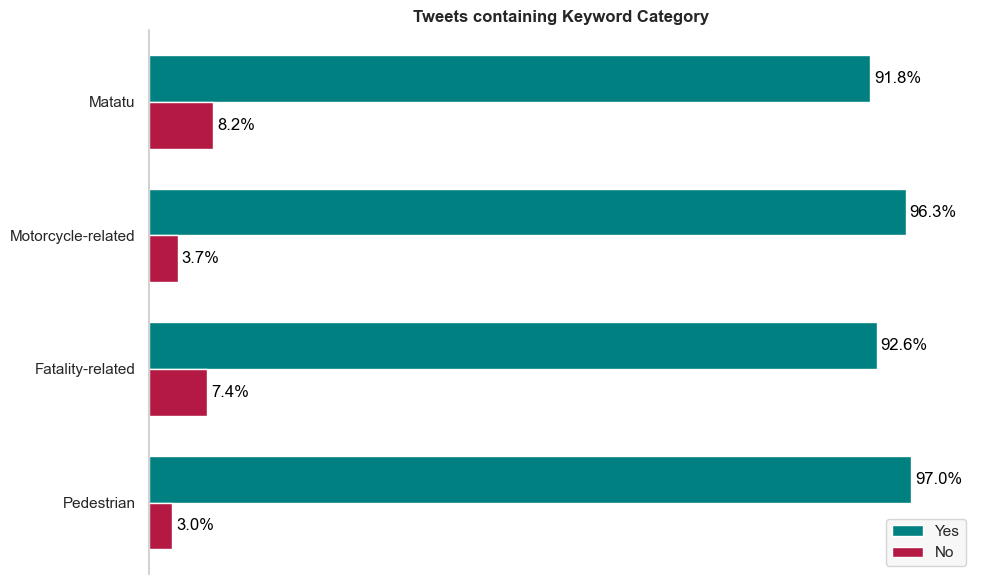

In [355]:
# Labels for categories
variables = ["Pedestrian", "Fatality-related", "Motorcycle-related", "Matatu"]

# Data: [Yes, No] percentages for each variable
data = [
    [97.0, 3.0],     # Pedestrian
    [92.6, 7.4],     # Fatality-related
    [96.3, 3.7],     # Motorcycle-related
    [91.8, 8.2],     # Matatu
]

# Set up bar positions
y = np.arange(len(variables))  # base y positions
bar_height = 0.35

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Colors
colors = {'Yes': 'teal', 'No': '#B31942'}

# Draw bars with Yes on top
for i, (yes, no) in enumerate(data):
    # Yes bar (upper bar visually)
    ax.barh(y[i] + bar_height / 2, yes, height=bar_height, color=colors['Yes'], label='Yes' if i == 0 else "")
    # No bar (lower bar visually)
    ax.barh(y[i] - bar_height / 2, no, height=bar_height, color=colors['No'], label='No' if i == 0 else "")

    # Labels
    ax.text(yes + 0.5, y[i] + bar_height / 2, f'{yes:.1f}%', va='center', color='black')
    ax.text(no + 0.5, y[i] - bar_height / 2, f'{no:.1f}%', va='center', color='black')

# Remove spines (top, right, and bottom as x-axis is removed)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Y-axis
ax.set_yticks(y)
ax.set_yticklabels(variables)

# Clean visuals
ax.grid(False)
ax.set_xticks([])
ax.set_xlim(0, 105)
ax.set_facecolor('white')

# Title and legend
ax.set_title('Tweets containing Keyword Category', fontsize=12, weight='bold')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()
